<a href="https://colab.research.google.com/github/Aryan-2602/PBL-PROJECT/blob/main/PBL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing dependancies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
import warnings
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Importing the dataset 
nasa_data = pd.read_csv('/content/drive/MyDrive/archive.zip')

Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nasa_data.head()

,Unnamed: 0,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


In [ ]:
nasa_data.shape

(24000, 18)

In [ ]:
nasa_data.isnull().sum()

Unnamed: 0                               0
id                                       0
neo_reference_id                         0
name                                     0
name_limited                         23856
designation                              0
absolute_magnitude_h                     8
is_potentially_hazardous_asteroid        0
is_sentry_object                         0
kilometers_estimated_diameter_min        8
kilometers_estimated_diameter_max        8
orbit_id                                 0
orbit_class_type                         0
perihelion_distance                      0
aphelion_distance                        0
first_observation_date                   0
last_observation_date                    0
orbit_class_description                  0
dtype: int64

In [ ]:
nasa_data['is_potentially_hazardous_asteroid'].value_counts()

False    21906
True      2094
Name: is_potentially_hazardous_asteroid, dtype: int64

In [ ]:
nasa_data['is_sentry_object'].value_counts()

False    22934
True      1066
Name: is_sentry_object, dtype: int64

In [ ]:
nasa_dataset = nasa_data.drop(['name', 'name_limited', 'designation', 'neo_reference_id',
                               'orbit_class_description','first_observation_date',
                               'last_observation_date'], axis = 1)

In [ ]:
nasa_dataset.head()

,Unnamed: 0,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance
0,0,2001981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360
1,1,2002059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945
2,2,2002061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155
3,3,2002062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633
4,4,2002063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804


In [ ]:
# Label Encoding

encoder = LabelEncoder()

In [ ]:
# Replacing the sentry object with 0 and 1
sentry_object = encoder.fit_transform(nasa_dataset.is_sentry_object)

# Replacing the hazardous object with 0 and 1
label = encoder.fit_transform(nasa_dataset.is_potentially_hazardous_asteroid)

# Replacing orbit class type with 0,1,2,3
orbit_type = encoder.fit_transform(nasa_dataset.orbit_class_type)


In [ ]:
# Adding it to main dataset
nasa_dataset['sentry_object'] = sentry_object

nasa_dataset['label'] = label

nasa_dataset['orbit_class_type'] = orbit_type 

In [ ]:
nasa_dataset.head()

,Unnamed: 0,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,sentry_object,label
0,0,2001981,15.22,True,False,2.401900,5.370812,229,1,0.621512,2.931360,0,1
1,1,2002059,15.97,False,False,1.700415,3.802244,268,0,1.238537,4.047945,0,0
2,2,2002061,16.36,False,False,1.420872,3.177167,180,0,1.050403,3.478155,0,0
3,3,2002062,17.10,False,False,1.010543,2.259644,149,2,0.790185,1.143633,0,0
4,4,2002063,17.28,False,False,0.930154,2.079888,143,1,0.701397,1.454804,0,0


In [ ]:
# Dropping the text data
objects_data = nasa_dataset.drop(['is_potentially_hazardous_asteroid', 'is_sentry_object'], axis =1)

In [ ]:
objects_data.head()

,Unnamed: 0,id,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,sentry_object,label
0,0,2001981,15.22,2.401900,5.370812,229,1,0.621512,2.931360,0,1
1,1,2002059,15.97,1.700415,3.802244,268,0,1.238537,4.047945,0,0
2,2,2002061,16.36,1.420872,3.177167,180,0,1.050403,3.478155,0,0
3,3,2002062,17.10,1.010543,2.259644,149,2,0.790185,1.143633,0,0
4,4,2002063,17.28,0.930154,2.079888,143,1,0.701397,1.454804,0,0


In [ ]:
objects_data.isnull().sum()

Unnamed: 0                           0
id                                   0
absolute_magnitude_h                 8
kilometers_estimated_diameter_min    8
kilometers_estimated_diameter_max    8
orbit_id                             0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
sentry_object                        0
label                                0
dtype: int64

In [ ]:
objects_data['label'].value_counts()

0    21906
1     2094
Name: label, dtype: int64

    Balancing the dataset

In [ ]:
hazardous = objects_data[objects_data.label == 1]
non_hazardous = objects_data[objects_data.label == 0]

In [ ]:
print(hazardous.shape)
print(non_hazardous.shape)

(2094, 11)
(21906, 11)


In [ ]:
# Highly Imbalanced
# To balance the dataset we should take equal amount of data in hazardous and non hazardous

In [ ]:
non_hazardous_sample = non_hazardous.sample(n = 2094)

In [ ]:
print(non_hazardous_sample.shape)

(2094, 11)


In [ ]:
# Concat the non hazardous sample and harardous labels

near_earth_objects = pd.concat([non_hazardous_sample, hazardous], axis = 0)

# Each data point will be added row wise , axis = 0

In [ ]:
near_earth_objects.head()

,Unnamed: 0,id,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,sentry_object,label
15823,15823,3771791,23.30,0.058151,0.130029,12,1,0.371041,4.365028,1,0
15120,15120,3763423,25.00,0.026580,0.059435,5,1,0.708947,2.852084,0,0
1315,1315,2337557,18.51,0.527904,1.180429,38,0,1.295739,2.087029,0,0
18981,18981,3836111,25.90,0.017561,0.039268,5,0,1.038041,3.575559,0,0
2129,2129,2465098,16.59,1.278071,2.857854,90,0,1.224126,4.753601,0,0


In [ ]:
near_earth_objects.shape

(4188, 11)

In [ ]:
near_earth_objects['label'].value_counts()

0    2094
1    2094
Name: label, dtype: int64

In [ ]:
# Now the dataset is balanced

In [ ]:
near_earth_objects.isnull().sum()

Unnamed: 0                           0
id                                   0
absolute_magnitude_h                 0
kilometers_estimated_diameter_min    1
kilometers_estimated_diameter_max    1
orbit_id                             0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
sentry_object                        0
label                                0
dtype: int64

In [ ]:
earth_object = near_earth_objects.fillna(' ')

In [ ]:
earth_object.isnull().sum()

Unnamed: 0                           0
id                                   0
absolute_magnitude_h                 0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
orbit_id                             0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
sentry_object                        0
label                                0
dtype: int64

In [ ]:
earth_object.describe()

,Unnamed: 0,id,absolute_magnitude_h,orbit_class_type,perihelion_distance,aphelion_distance,sentry_object,label
count,4188.000000,4.188000e+03,4188.00000,4188.000000,4188.000000,4188.000000,4188.000000,4188.00000
mean,9963.652340,5.959049e+06,21.60308,0.844556,0.846927,2.698216,0.027937,0.50000
std,7168.176653,1.133660e+07,2.76608,0.549400,0.241158,1.194512,0.164812,0.50006
min,0.000000,2.001981e+06,14.04000,0.000000,0.073180,0.773657,0.000000,0.00000
25%,3169.500000,3.063461e+06,19.70000,1.000000,0.705401,1.763481,0.000000,0.00000
50%,9126.000000,3.606082e+06,21.18000,1.000000,0.893610,2.586052,0.000000,0.50000
75%,15984.750000,3.774017e+06,23.40000,1.000000,1.013096,3.520682,0.000000,1.00000
max,23991.000000,5.407558e+07,31.70000,3.000000,1.299363,34.624876,1.000000,1.00000


In [ ]:
earth_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 15823 to 23919
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         4188 non-null   int64  
 1   id                                 4188 non-null   int64  
 2   absolute_magnitude_h               4188 non-null   float64
 3   kilometers_estimated_diameter_min  4188 non-null   object 
 4   kilometers_estimated_diameter_max  4188 non-null   object 
 5   orbit_id                           4188 non-null   object 
 6   orbit_class_type                   4188 non-null   int64  
 7   perihelion_distance                4188 non-null   float64
 8   aphelion_distance                  4188 non-null   float64
 9   sentry_object                      4188 non-null   int64  
 10  label                              4188 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 39

In [ ]:
earth_object.head()

,Unnamed: 0,id,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,sentry_object,label
15823,15823,3771791,23.30,0.058151,0.130029,12,1,0.371041,4.365028,1,0
15120,15120,3763423,25.00,0.02658,0.059435,5,1,0.708947,2.852084,0,0
1315,1315,2337557,18.51,0.527904,1.180429,38,0,1.295739,2.087029,0,0
18981,18981,3836111,25.90,0.017561,0.039268,5,0,1.038041,3.575559,0,0
2129,2129,2465098,16.59,1.278071,2.857854,90,0,1.224126,4.753601,0,0


In [ ]:
earth_object.corr(method ='pearson')

,Unnamed: 0,id,absolute_magnitude_h,orbit_class_type,perihelion_distance,aphelion_distance,sentry_object,label
Unnamed: 0,1.000000,0.467715,0.495540,-0.102364,0.122481,0.034405,0.076483,-0.325845
id,0.467715,1.000000,0.166110,-0.042477,0.042374,0.017699,0.042064,-0.104936
absolute_magnitude_h,0.495540,0.166110,1.000000,-0.024716,0.147963,-0.220060,0.296586,-0.545119
orbit_class_type,-0.102364,-0.042477,-0.024716,1.000000,-0.667455,-0.268426,0.071710,0.342952
perihelion_distance,0.122481,0.042374,0.147963,-0.667455,1.000000,0.095131,-0.028263,-0.359657
aphelion_distance,0.034405,0.017699,-0.220060,-0.268426,0.095131,1.000000,-0.012765,0.082590
sentry_object,0.076483,0.042064,0.296586,0.071710,-0.028263,-0.012765,1.000000,-0.137651
label,-0.325845,-0.104936,-0.545119,0.342952,-0.359657,0.082590,-0.137651,1.000000


**Data Visualization**

Text(0.5, 1.0, 'Distribution of Missing Values')

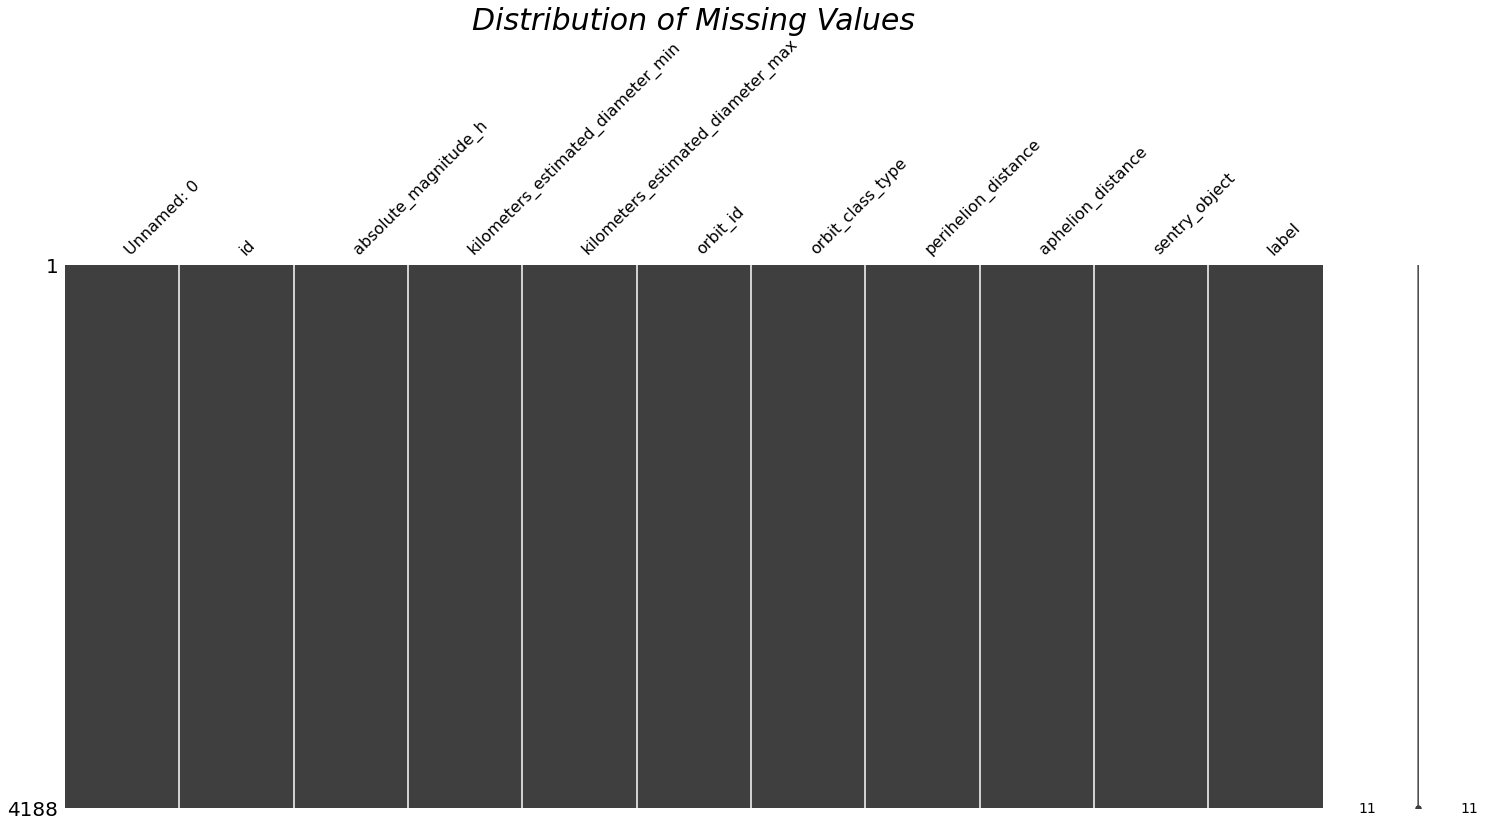

In [ ]:
msno.matrix(earth_object)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')

In [ ]:
earth_object = earth_object.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
earth_object['absolute_magnitude_h'] = earth_object['absolute_magnitude_h'].astype(float)
earth_object['kilometers_estimated_diameter_min'] = earth_object['kilometers_estimated_diameter_min'].astype(float)
earth_object['kilometers_estimated_diameter_max'] = earth_object['kilometers_estimated_diameter_max'].astype(float)
earth_object['perihelion_distance'] = earth_object['perihelion_distance'].astype(float)
earth_object['aphelion_distance'] = earth_object['aphelion_distance'].astype(float)

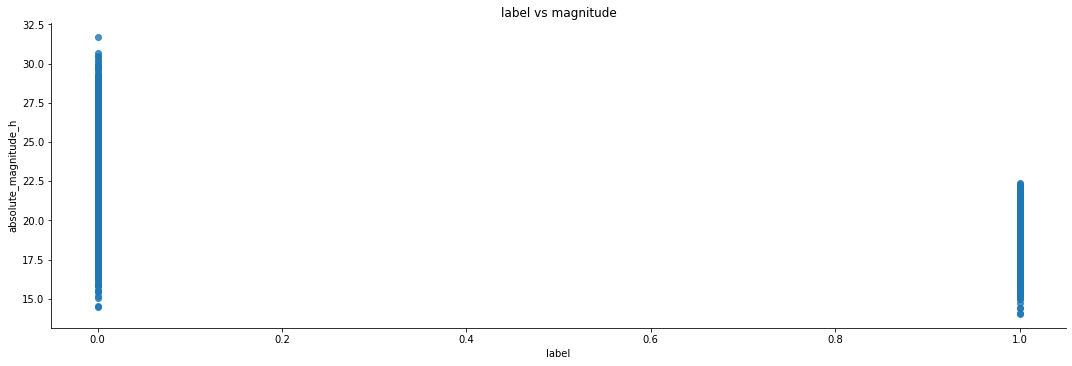

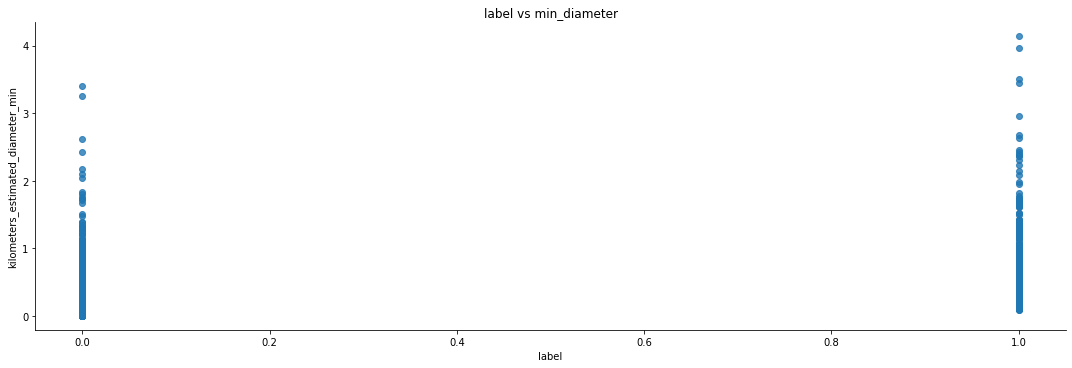

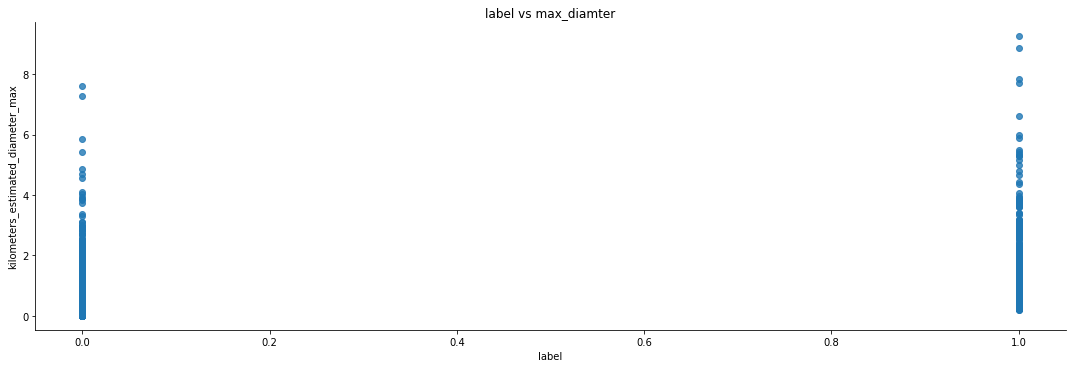

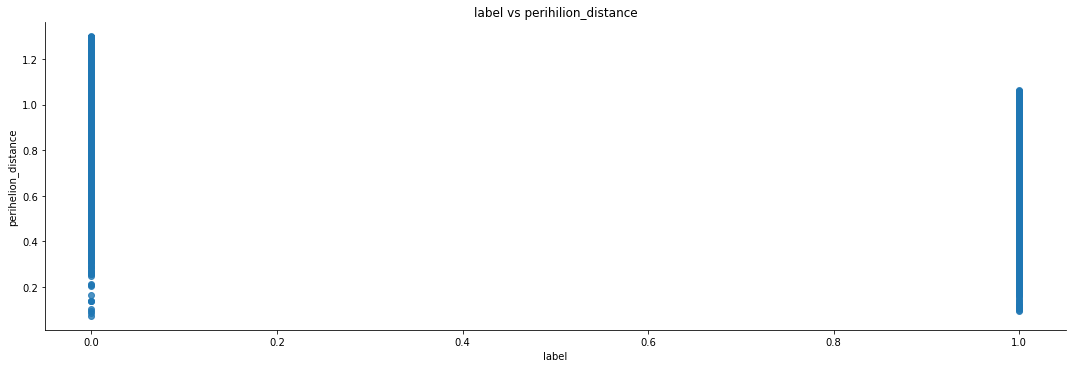

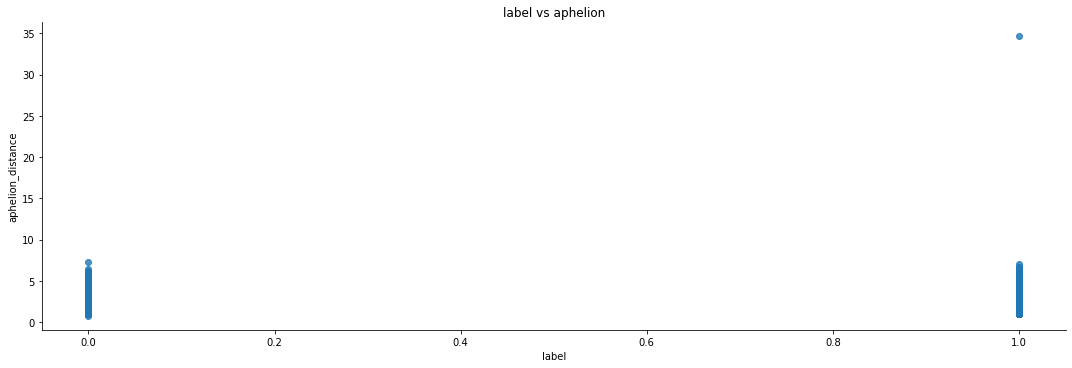

In [ ]:
parameters_all = ['absolute_magnitude_h','kilometers_estimated_diameter_min','kilometers_estimated_diameter_max','perihelion_distance','aphelion_distance']
color_all = ["black", "red", "green","purple",'grey']
title_all = ["label vs magnitude", "label vs min_diameter", "label vs max_diamter",'label vs perihilion_distance','label vs aphelion']
for i,j,k in zip(parameters_all,color_all, title_all):
    sns.lmplot(x ="label" ,y= i, data = earth_object, lowess = True, aspect = 3, line_kws = {'color':j}).set(title=k)
    plt.show()

Data Visualization

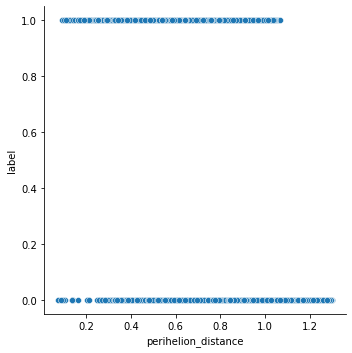

In [ ]:
sns.relplot(data = earth_object , x = 'perihelion_distance', y = 'label')

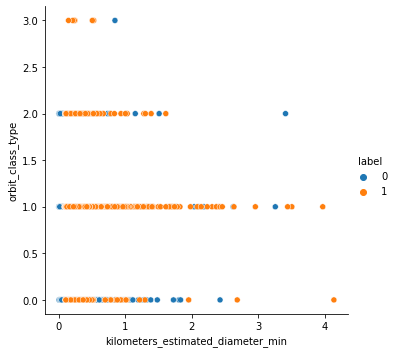

In [ ]:
sns.relplot(data = earth_object , x = 'kilometers_estimated_diameter_min', y = 'orbit_class_type',hue = 'label')

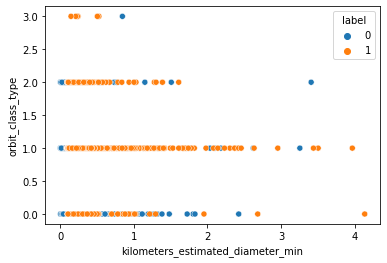

In [ ]:
sns.scatterplot(x = 'kilometers_estimated_diameter_min', y = 'orbit_class_type', hue = 'label', data = earth_object)

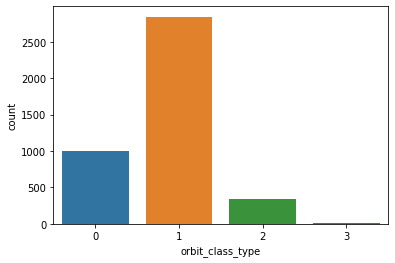

In [ ]:
sns.countplot(x='orbit_class_type',  data=earth_object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


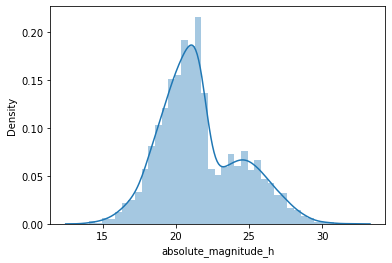

In [ ]:
sns.distplot(earth_object['absolute_magnitude_h'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


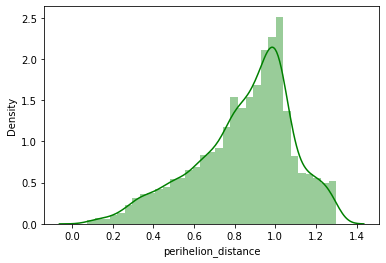

In [ ]:
sns.distplot(earth_object['perihelion_distance'], color = 'green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


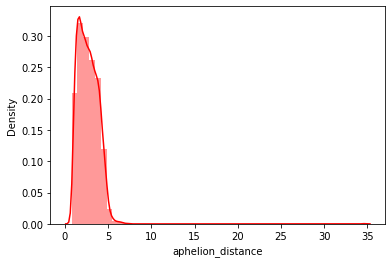

In [ ]:
sns.distplot(earth_object['aphelion_distance'], color = 'red')

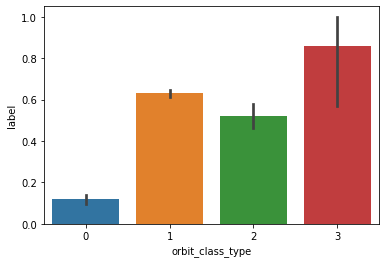

In [ ]:
sns.barplot(x= 'orbit_class_type', y = 'label', data = earth_object)

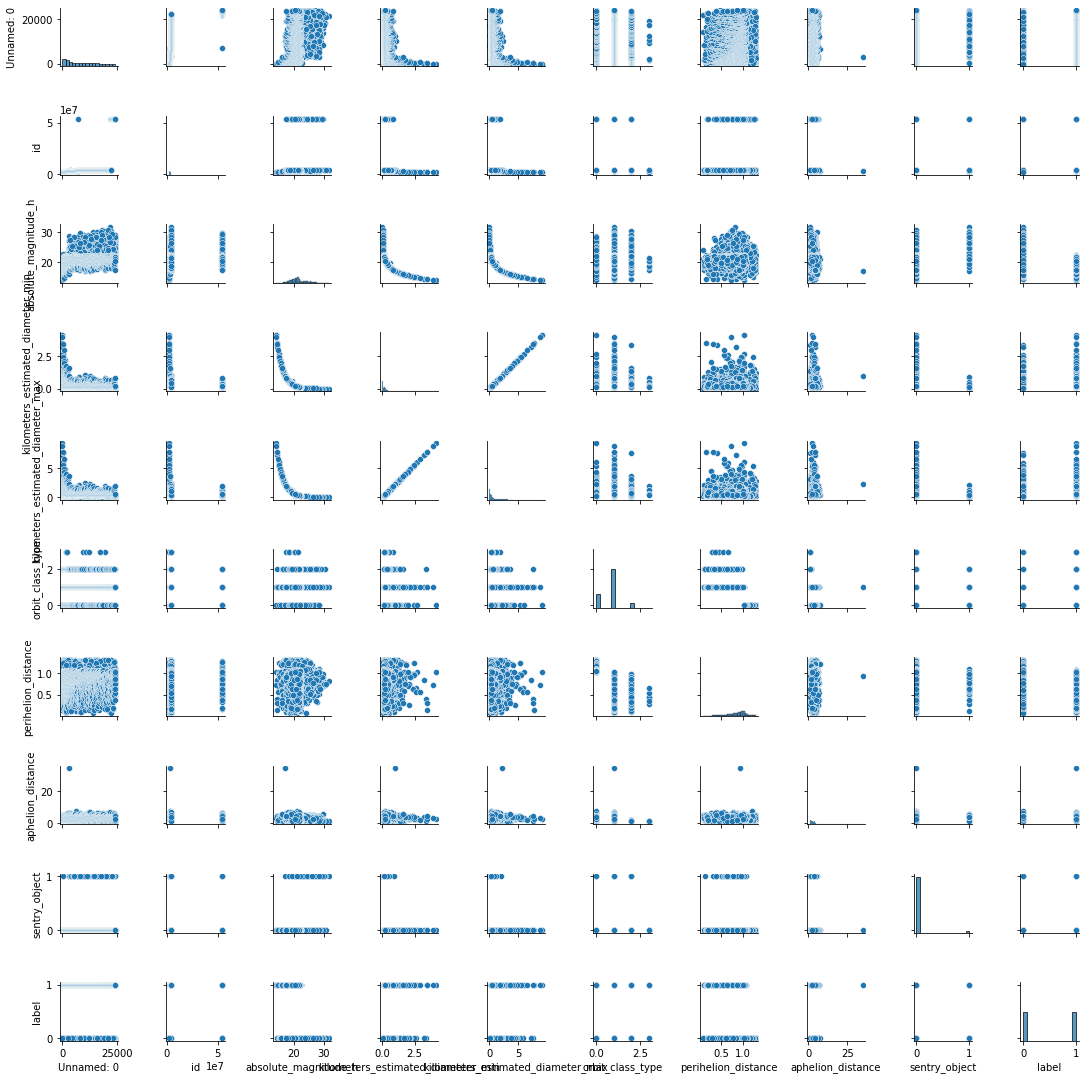

In [ ]:
g = sns.pairplot(earth_object)
g.fig.set_size_inches(15,15)

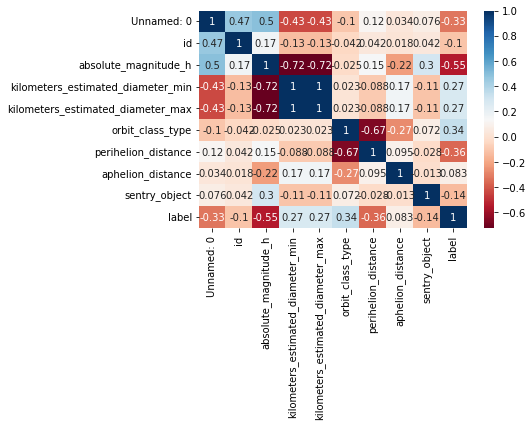

<Figure size 1080x1080 with 0 Axes>

In [ ]:
sns.heatmap(earth_object.corr(), annot=True, cmap='RdBu')
plt.figure(figsize = (15,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


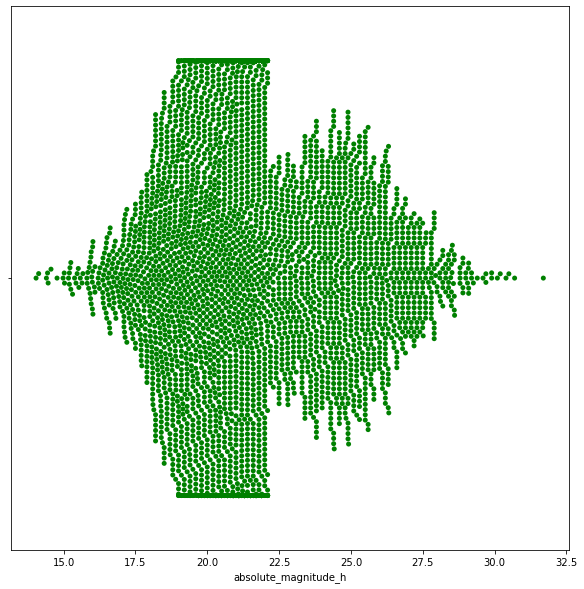

In [ ]:
plt.figure(figsize = (10,10))
plot = sns.swarmplot(earth_object['absolute_magnitude_h'], color = 'green')

Splitting data into features and labels

In [ ]:
earth_object.isnull().sum()

Unnamed: 0                           0
id                                   0
absolute_magnitude_h                 0
kilometers_estimated_diameter_min    1
kilometers_estimated_diameter_max    1
orbit_id                             0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
sentry_object                        0
label                                0
dtype: int64

In [ ]:
earth_object['kilometers_estimated_diameter_min'].fillna(0, inplace = True)
earth_object['kilometers_estimated_diameter_max'].fillna(0, inplace = True)
earth_object['absolute_magnitude_h'].fillna(0, inplace = True)

In [ ]:
earth_object.isnull().sum()

Unnamed: 0                           0
id                                   0
absolute_magnitude_h                 0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
orbit_id                             0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
sentry_object                        0
label                                0
dtype: int64

In [ ]:
X = earth_object.drop(['label', 'orbit_id'], axis = 1)
Y = earth_object['label']

In [ ]:
earth_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 15823 to 23919
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         4188 non-null   int64  
 1   id                                 4188 non-null   int64  
 2   absolute_magnitude_h               4188 non-null   float64
 3   kilometers_estimated_diameter_min  4188 non-null   float64
 4   kilometers_estimated_diameter_max  4188 non-null   float64
 5   orbit_id                           4188 non-null   object 
 6   orbit_class_type                   4188 non-null   int64  
 7   perihelion_distance                4188 non-null   float64
 8   aphelion_distance                  4188 non-null   float64
 9   sentry_object                      4188 non-null   int64  
 10  label                              4188 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 52

In [ ]:
print(X)
print(Y)

       Unnamed: 0        id  absolute_magnitude_h  \
15823       15823   3771791                 23.30   
15120       15120   3763423                 25.00   
1315         1315   2337557                 18.51   
18981       18981   3836111                 25.90   
2129         2129   2465098                 16.59   
...           ...       ...                   ...   
23805       23805  54054747                 21.70   
23818       23818  54055026                 21.70   
23864       23864  54055104                 20.80   
23911       23911  54065895                 21.05   
23919       23919  54065904                 20.40   

       kilometers_estimated_diameter_min  kilometers_estimated_diameter_max  \
15823                           0.058151                           0.130029   
15120                           0.026580                           0.059435   
1315                            0.527904                           1.180429   
18981                           0.017561       

Dividing the train and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4188, 9) (3350, 9) (838, 9)


    Comparing Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# List of models
models = [LogisticRegression(max_iter = 1000),  KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models():

  for model in models:

    model.fit(X_train, Y_train)

    test_data_prediction = model.predict(X_test)

    training_accuracy_score = accuracy_score(Y_test, test_data_prediction)

    print(f"The accuracy score of {model} is {training_accuracy_score}")


In [ ]:
compare_models()

The accuracy score of LogisticRegression(max_iter=1000) is 0.5155131264916468
The accuracy score of KNeighborsClassifier() is 0.6073985680190931
The accuracy score of RandomForestClassifier() is 0.9069212410501193
